![](images/mk.png)

<h1><center>ONLINE SUPPLEMENT</center></h1>

John McLevey & Reid-McIlroy-Young. **Introducing *metaknowledge*: Software for Computational Research in Information Science, Science of Science, and Network Analysis.** *Journal of Informetrics*. XX(XX):XX-XX.

<h1><center>Part 4: Network Analysis</center></h1>

These supplementary notebooks were prepared by Dr. [John McLevey](http://www.johnmclevey.com/) (University of Waterloo), [Reid McIlroy-Young](http://reidmcy.com/) (University of Chicago), and [Jillian Anderson](http://networkslab.org/) (NetLab, University of Waterloo). The code in this notebook is current as of *metaknowledge* version XXX.

In [3]:
%matplotlib inline

import metaknowledge as mk
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import community
import pandas

plt.rc("savefig", dpi=300) # improve default resolution of graphics
sns.set(font_scale=.75)

import os
os.chdir('.') # .. is a special symbol for the directory above the current one

In [4]:
RC = mk.RecordCollection('raw_data/imetrics/', cached = True)
RC1014 = RC.yearSplit(2010,2014)

## Co-Author Networks

* produce network from record collection
* get quick stats

In [5]:
coauth_net = RC.networkCoAuthor() 
print(mk.graphStats(coauth_net))

The graph has 10104 nodes, 15507 edges, 1111 isolates, 0 self loops, a density of 0.000303818 and a transitivity of 0.555409


* modify network object in memory by dropping edges and self-loops
* modify network object by extracting the giant component (e.g. of *networkx*)

In [6]:
mk.dropEdges(coauth_net, minWeight = 2, dropSelfLoops = True) 
giant_coauth = max(nx.connected_component_subgraphs(coauth_net), key=len)
mk.graphStats(giant_coauth)

'The graph has 265 nodes, 443 edges, 0 isolates, 0 self loops, a density of 0.0126644 and a transitivity of 0.285714'

* can use other *networkx* functions, such as computing centralities and global network properties

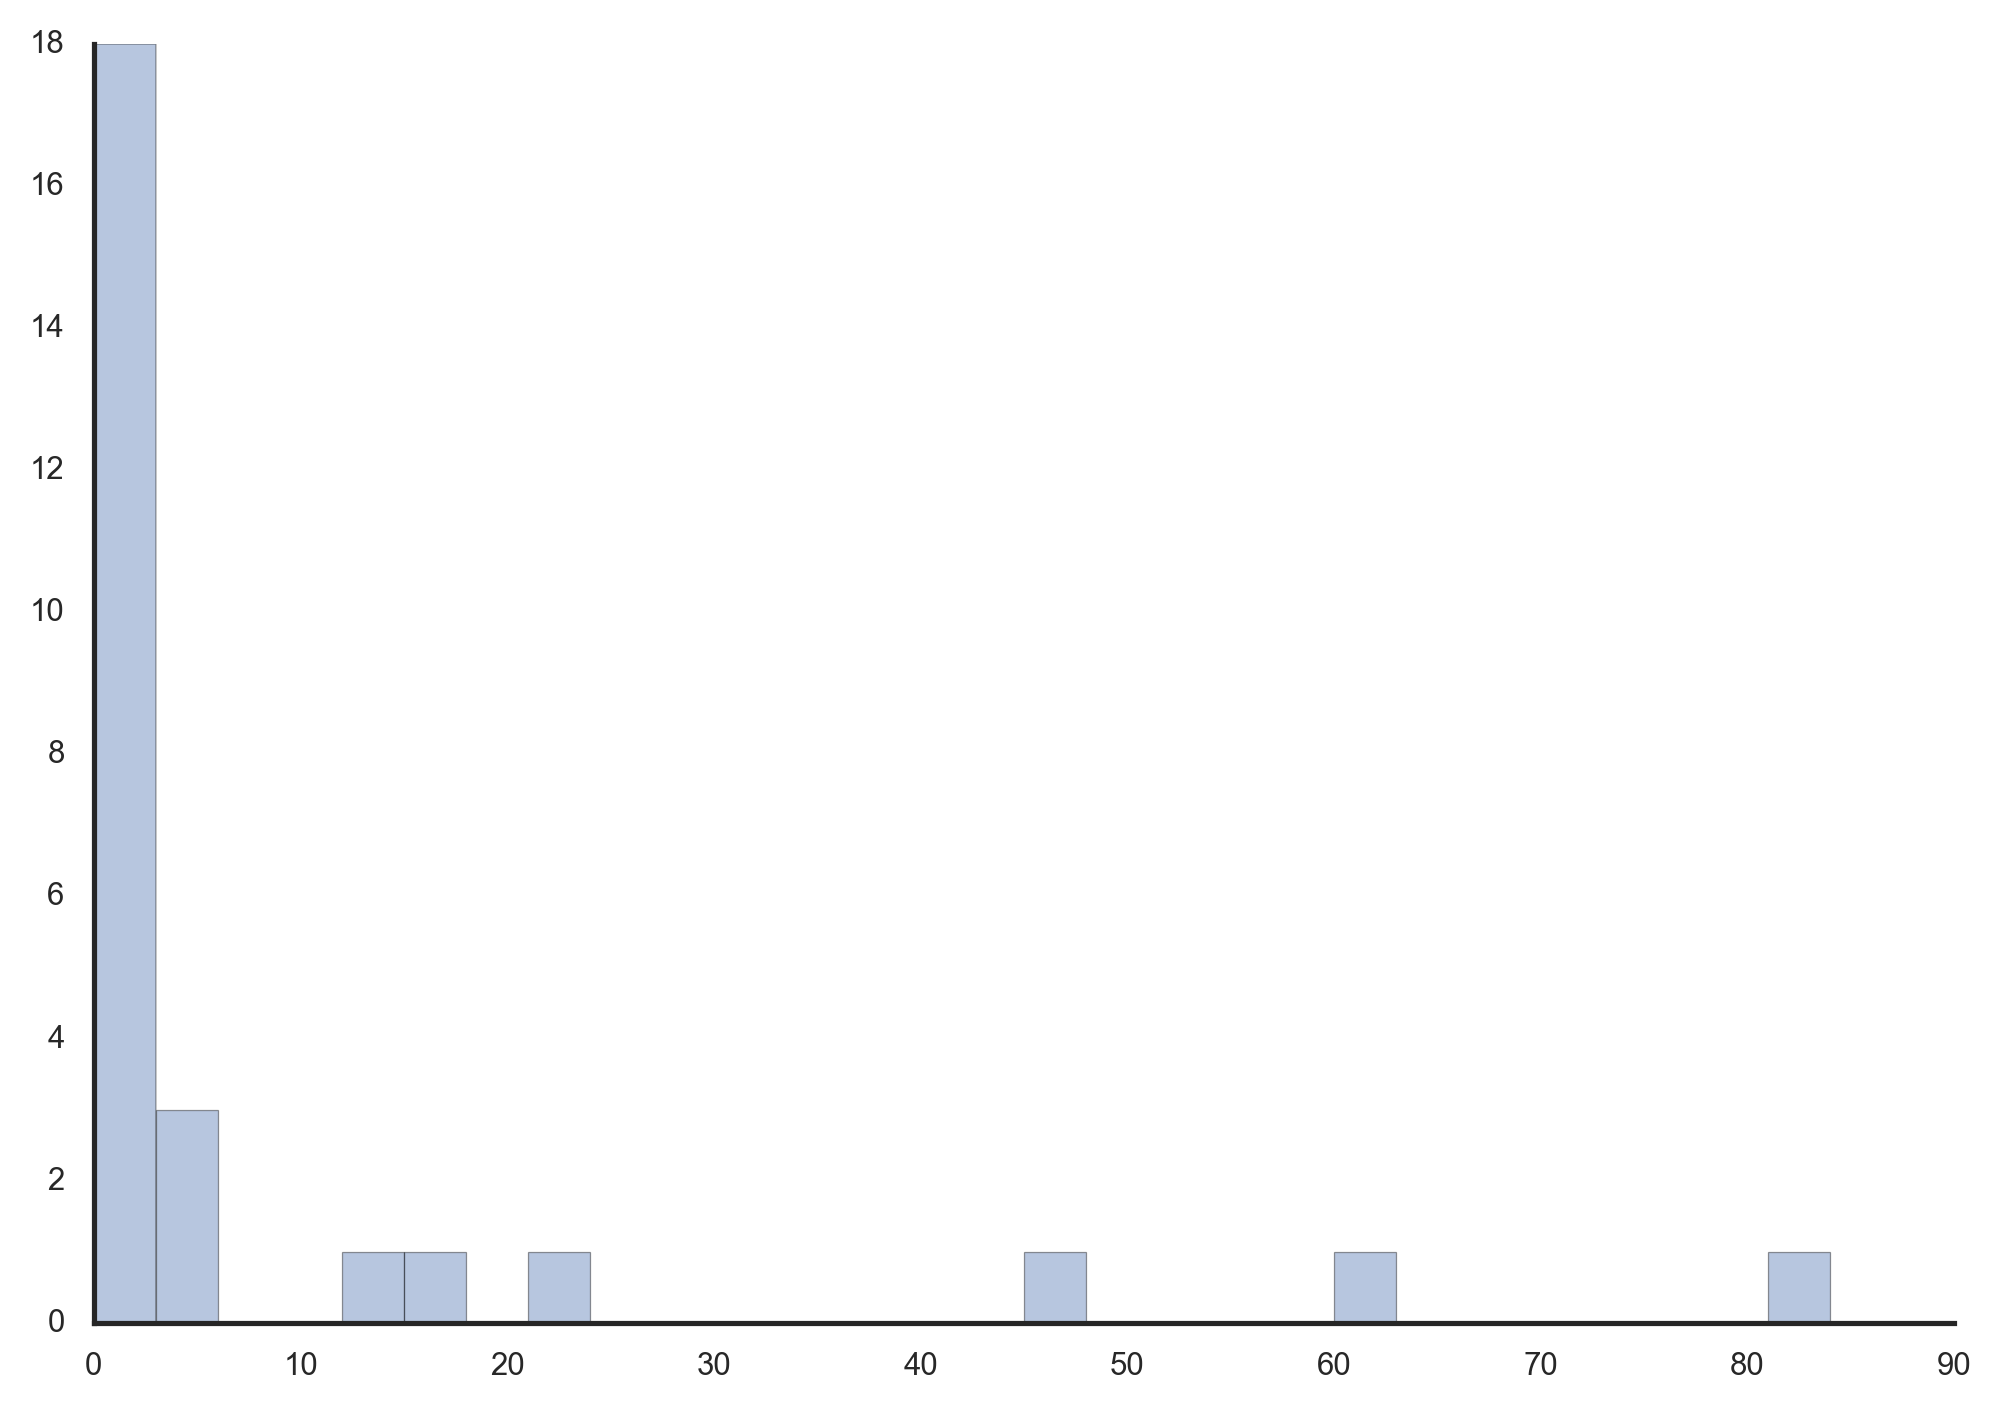

In [7]:
dh = nx.degree_histogram(giant_coauth)

with sns.axes_style("white"):
    sns.distplot(dh, kde=False, rug=False)
    sns.despine()

In [8]:
deg = nx.degree_centrality(giant_coauth)
eig = nx.eigenvector_centrality(giant_coauth)

In [9]:
cent_df = pandas.DataFrame.from_dict([deg, eig])
cent_df = pandas.DataFrame.transpose(cent_df)
cent_df.columns = ['degree', 'eigenvector']
cent_df[:10]

,degree,eigenvector
"Abrizah, A.",0.007576,2.247156e-05
"Albarran, Pedro",0.011364,5.906076e-07
"Archambault, Eric",0.011364,1.818886e-04
"Arencibia-Jorge, Ricardo",0.003788,4.431288e-04
"Arora, Sanjay K.",0.007576,1.219429e-05
"Arsenault, Clement",0.007576,3.405122e-05
"Bar-Ilan, Judit",0.022727,2.385037e-05
"Barjak, Franz",0.003788,2.244758e-05
"Barnett, George A.",0.003788,1.801193e-03
"Bauer, Johann",0.003788,3.188824e-02


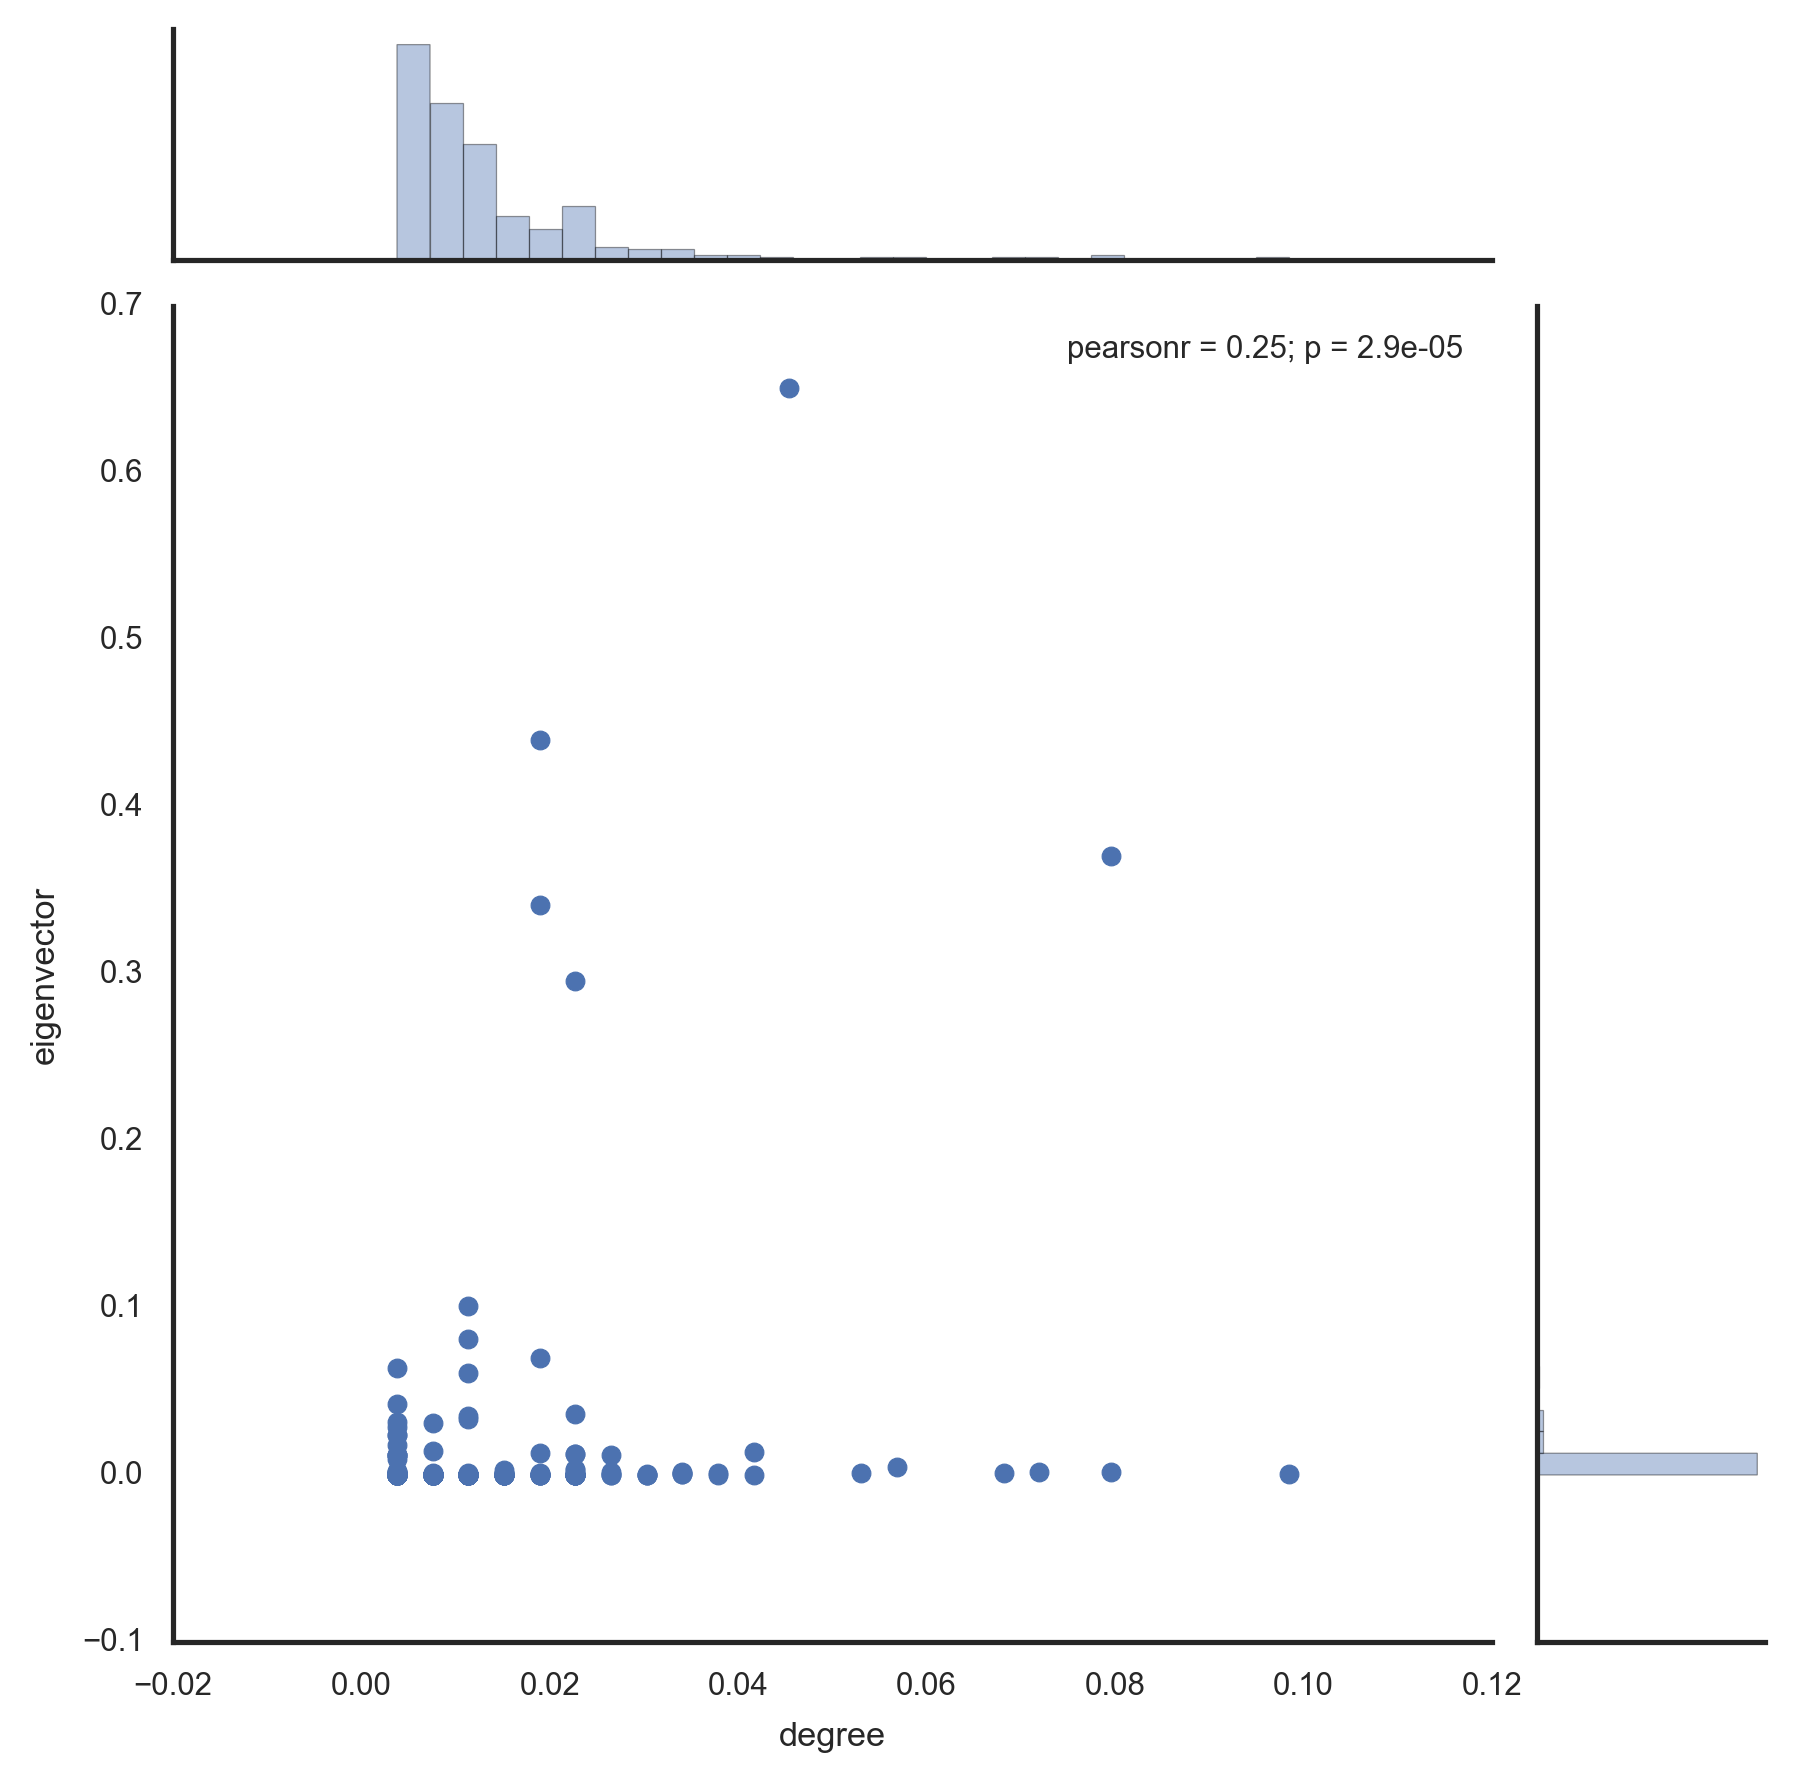

In [10]:
# not sure why it won't accept my x and y axis limits at 0... Ried, any thoughts? 
with sns.axes_style("white"):
    sns.jointplot(x="degree", y="eigenvector", data=cent_df)
    sns.despine()

* *networkx* does an adequete job of creating static visualizations of networks, provided they are not too large

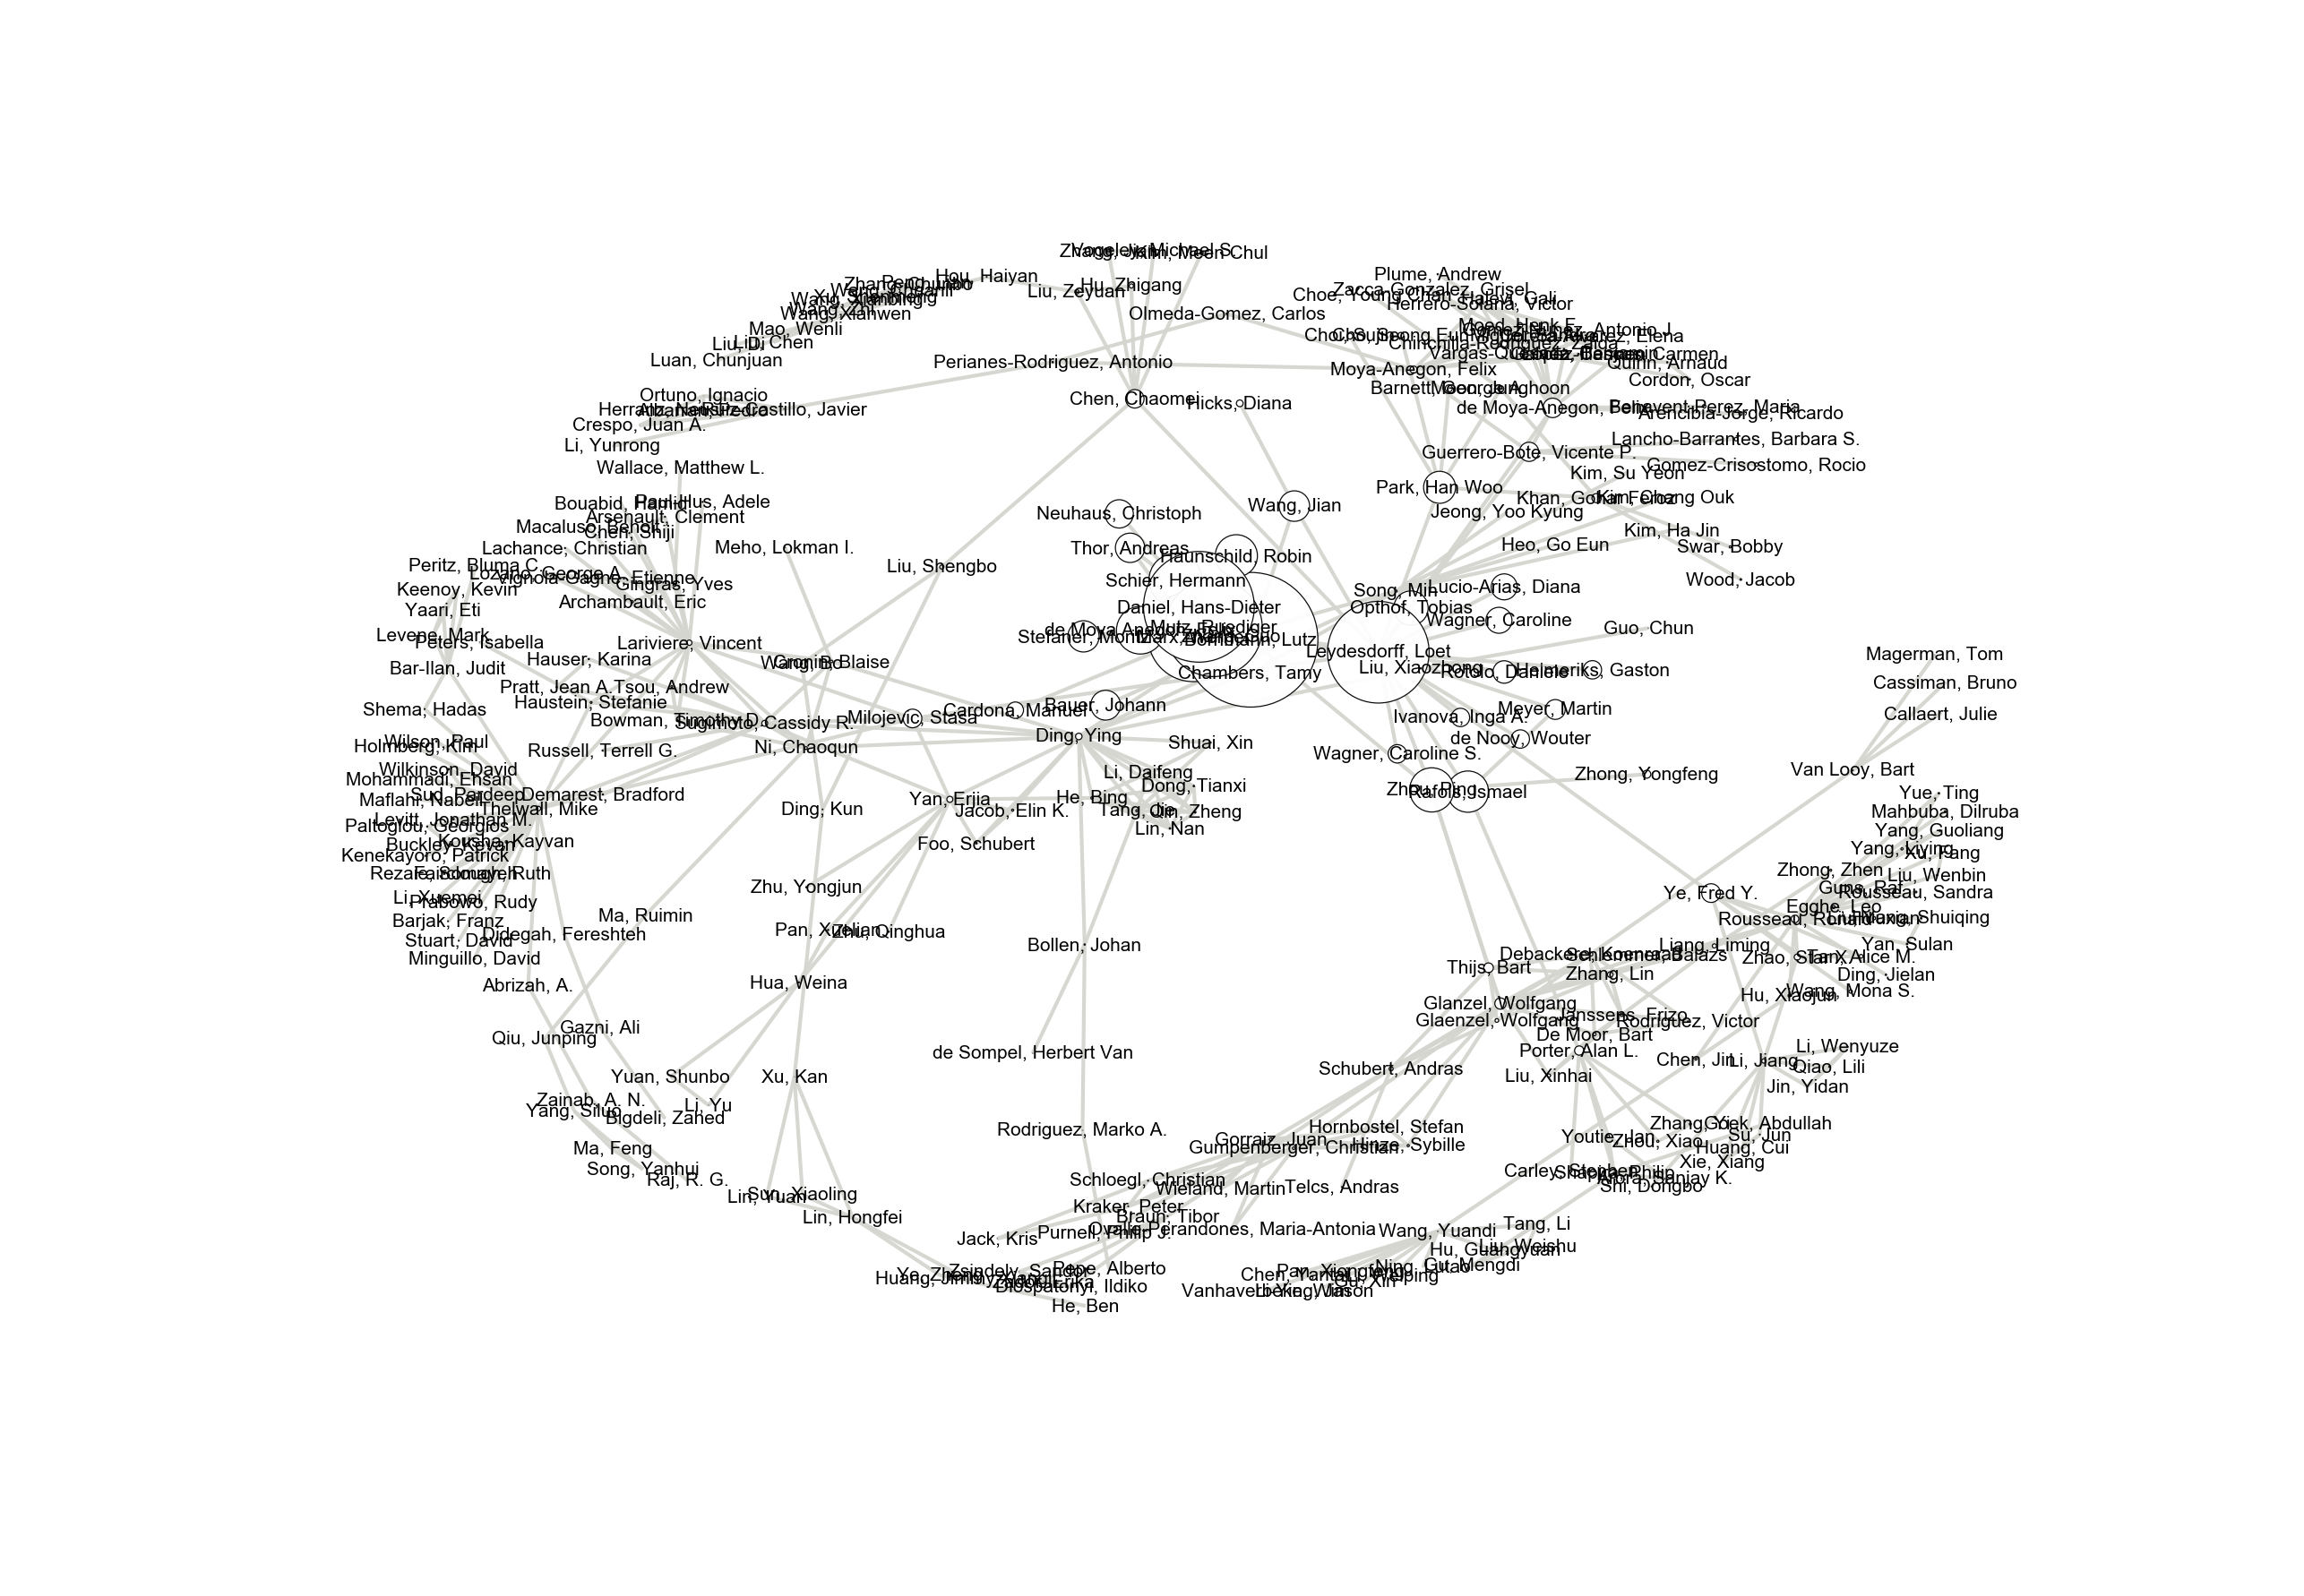

In [11]:
eig = nx.eigenvector_centrality(giant_coauth)
size = [2000 * eig[node] for node in giant_coauth]

nx.draw_spring(giant_coauth, node_size = size, with_labels = True, font_size = 5, 
               node_color = "#FFFFFF", edge_color = "#D4D5CE", alpha = .95)
plt.savefig('figures/network_coauthors.pdf')

* use the *community* package to compute modularity and detect community structure in the network

In [12]:
# no idea why, but this doesn't run on my laptop... 
# I used it (see article) before and it works fine on Jillian's machine

partition = community.best_partition(giant_coauth)
modularity = community.modularity(partition, giant_coauth) 
print('Modularity:', modularity)

Modularity: 0.8402222325289843


In [13]:
colors = [partition[n] for n in giant_coauth.nodes()] 
nx.draw_spring(giant, node_color=colors , cmap=plt.cm.Accent , node_size = degSize)
plt.savefig('figures/coauthors_community.pdf')

NameError: name 'giant' is not defined

# Co-Citation

In [ ]:
journal_cocite = RC1014.networkCoCitation(coreOnly = True) 
mk.dropEdges(journal_cocite , minWeight = 3)
mk.graphStats(journal_cocite)

In [ ]:
# visualize the giant component only
giantJournal = max(nx.connected_component_subgraphs(journal_cocite), key=len)

In [ ]:
nx.draw_spring(giantJournal, with_labels = False, node_size = 75, 
              node_color = "#77787B", edge_color = "#D4D5CE", alpha = .95)
plt.savefig('figures/network_journal_cocite.pdf')

In [ ]:
partition = community.best_partition(giant) 
modularity = community.modularity(partition, giant) 
print(modularity)

colors = [partition[n] for n in giant.nodes()] 
nx.draw_spring(giant, node_color=colors, with_labels = False, cmap=plt.cm.Accent, node_size = 75)
plt.savefig('figures/network_journal_cocite_community.pdf')

# Co-Investigator Networks

In [ ]:
# Reid, can you fix the bugs in this network generator? Thanks. -JM
sshrc_grants = mk.GrantCollection('raw_data/grants/SSHRC/')
ci_nets = sshrc_grants.networkCoInvestigator(targetTags = 'Institution') 
# ci_nets = sshrc_grants.networkCoInvestigator(nodeType = 'institution') 
mk.graphStats(ci_nets)

In [ ]:
nx.draw_spring(ci_nets, with_labels = False, node_size = 100)
plt.savefig('figures/network_coinvestigator.pdf')

# One-Mode Networks (e.g. Keyword Co-Occurance)

Going back to the information science and bibliometrics `record collection`...

In [14]:
keywords = RC1014.networkOneMode('keywords')
mk.graphStats(keywords)

'The graph has 2950 nodes, 31524 edges, 19 isolates, 0 self loops, a density of 0.00724727 and a transitivity of 0.144872'

In [15]:
mk.dropEdges(keywords, minWeight = 10, dropSelfLoops = True) 
mk.dropNodesByDegree(keywords, minDegree = 1, useWeight = False)

keywordsGiant = max(nx.connected_component_subgraphs(keywords), key=len)
mk.graphStats(keywordsGiant)

'The graph has 83 nodes, 221 edges, 0 isolates, 0 self loops, a density of 0.0649427 and a transitivity of 0.203002'

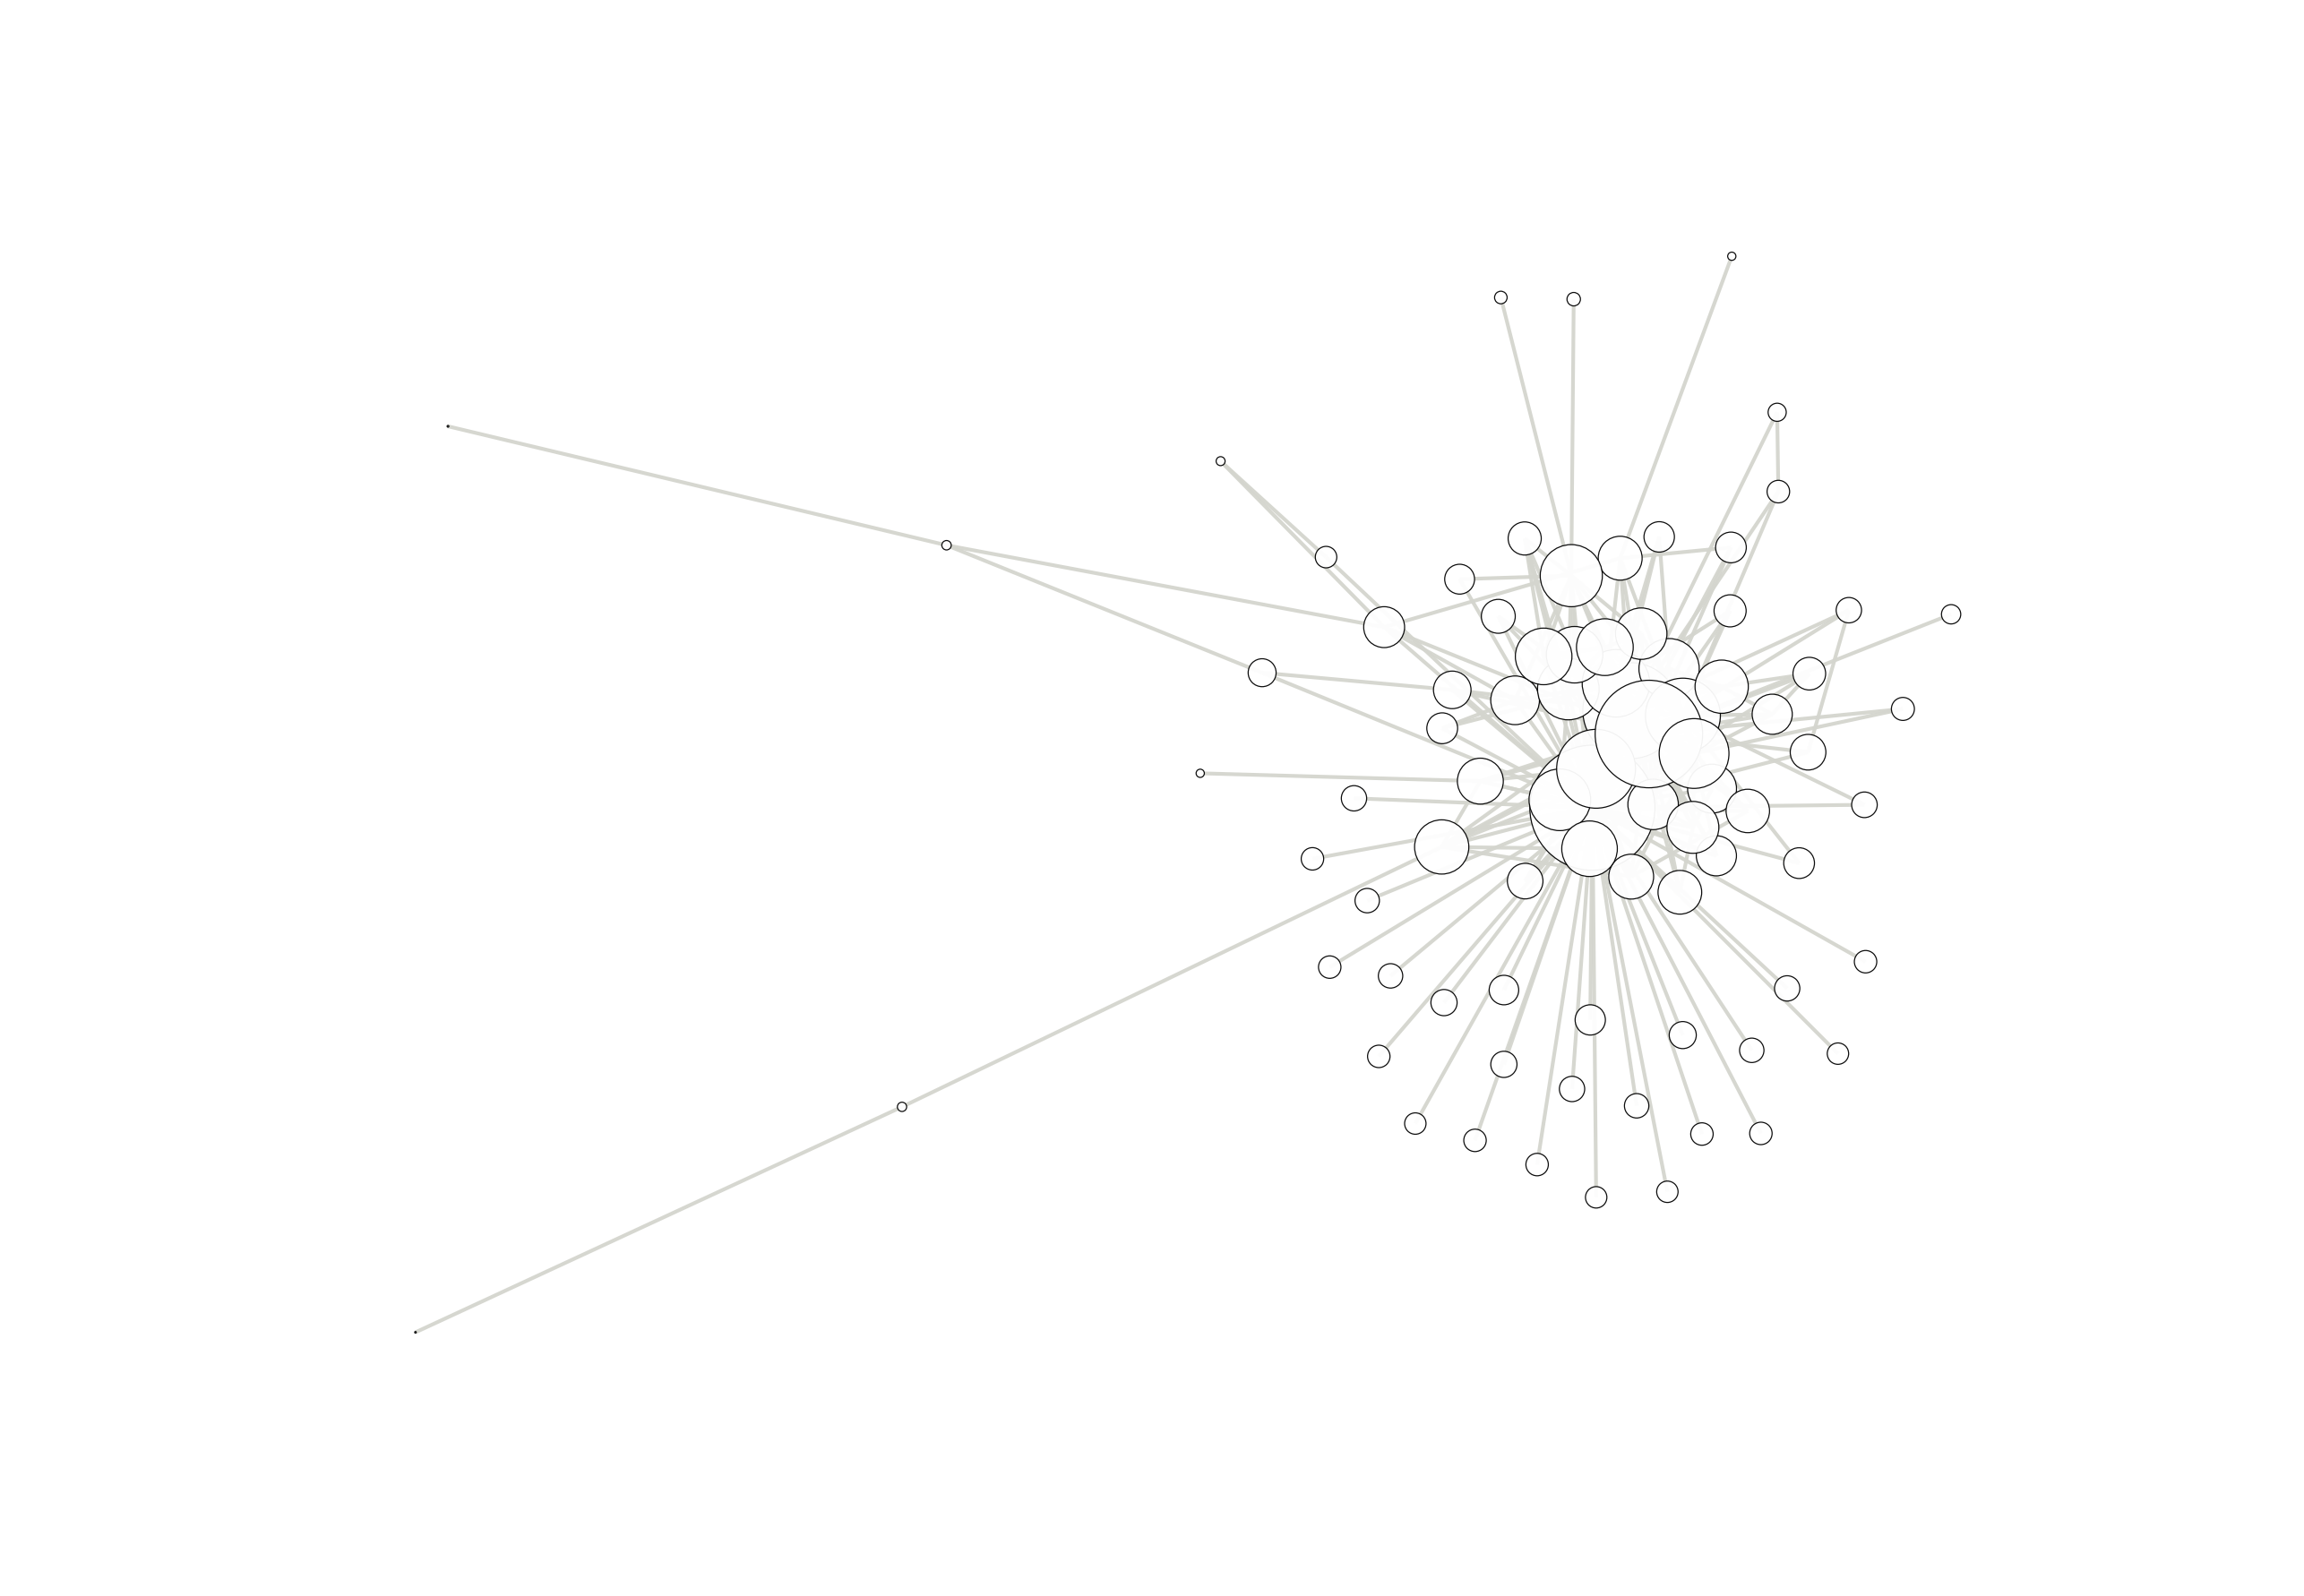

In [16]:
eig = nx.eigenvector_centrality(keywordsGiant)
size = [2000 * eig[node] for node in keywordsGiant]

nx.draw_spring(keywordsGiant, with_labels = False, node_size = size, 
               node_color = "#FFFFFF", edge_color = "#D4D5CE", alpha = .95)
plt.savefig('figures/network_keywords.pdf')

# Two-Mode Networks

In [17]:
two_mode = RC1014.networkTwoMode('keywords', 'authorsFull') 
mk.dropEdges(two_mode, minWeight = 3, dropSelfLoops = True) 
mk.dropNodesByDegree(two_mode, minDegree = 1, useWeight = False)

two_mode = max(nx.connected_component_subgraphs(two_mode), key=len)
mk.graphStats(two_mode)

'The graph has 316 nodes, 622 edges, 0 isolates, 0 self loops, a density of 0.0124975 and a transitivity of 0'

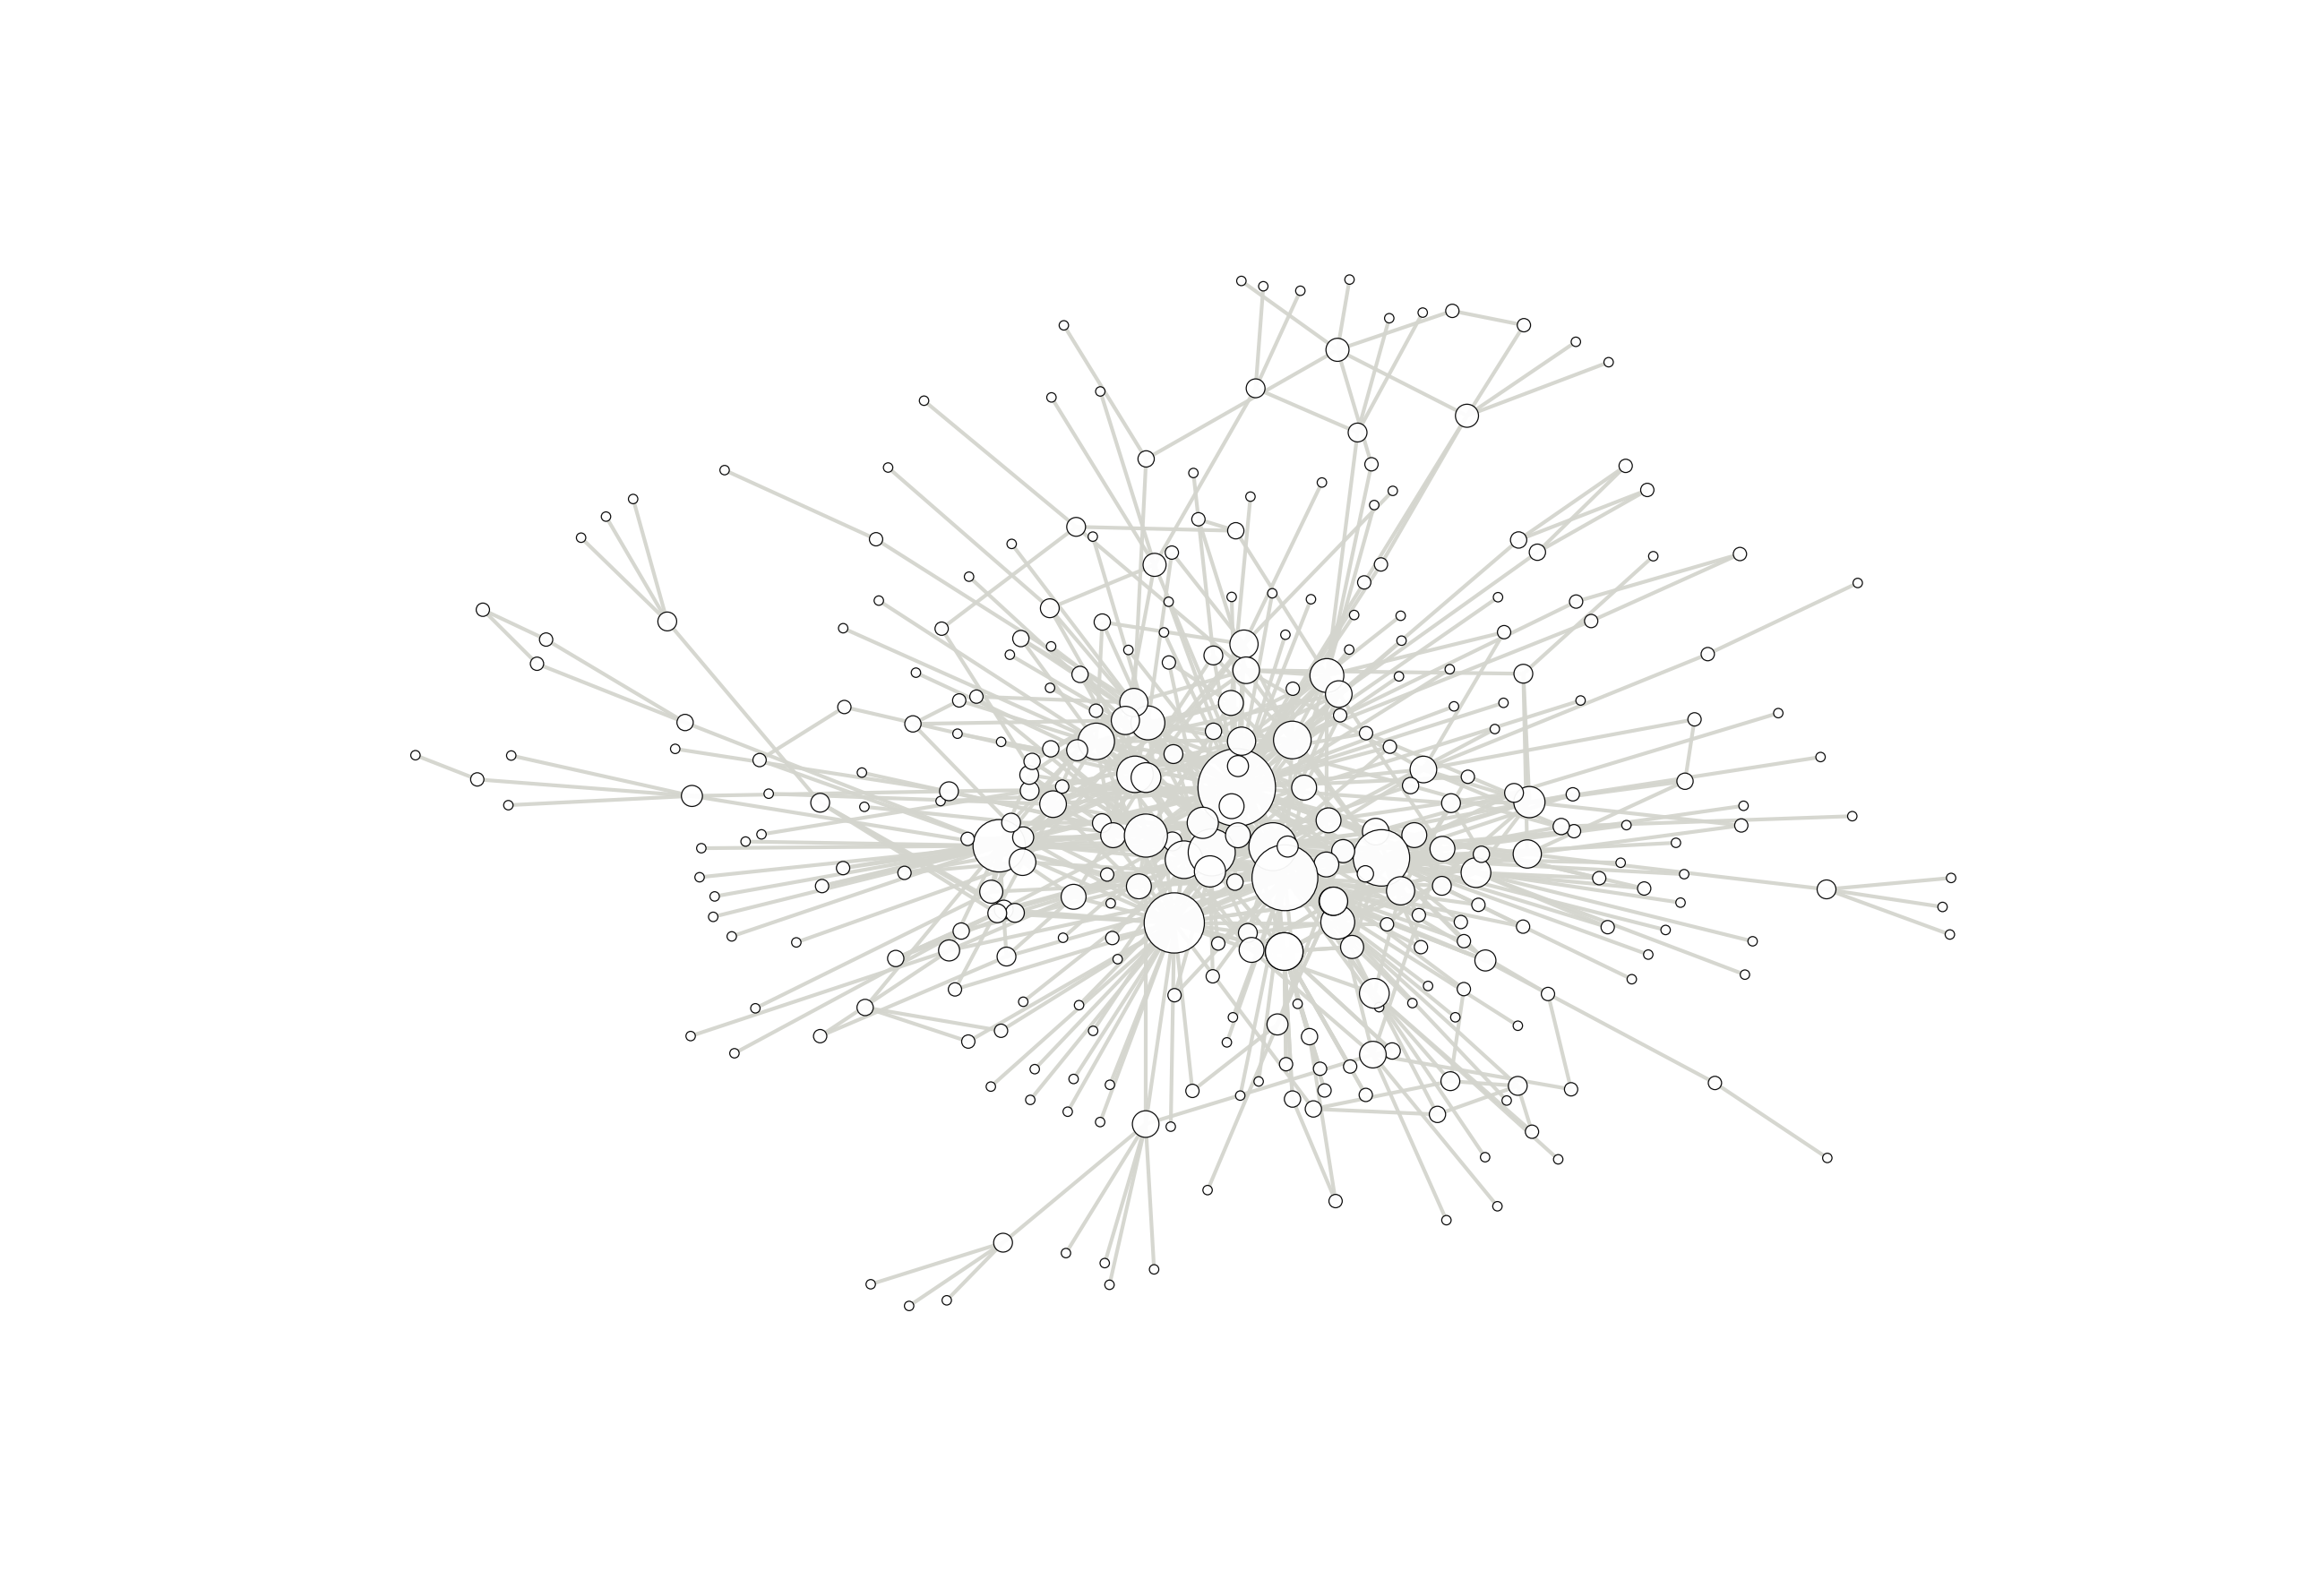

In [18]:
deg = nx.degree_centrality(two_mode)
size = [2000 * deg[node] for node in two_mode]

nx.draw_spring(two_mode, with_labels = False, node_size = size, 
               node_color = '#FFFFFF', edge_color = "#D4D5CE", alpha = .95)

# Multi-Level Networks

In [19]:
multilevel = RC1014.networkMultiLevel('keywords', 'authorsFull')
mk.dropEdges(multilevel, minWeight = 3, dropSelfLoops = True) 
mk.dropNodesByDegree(multilevel, minDegree = 1, useWeight = False)

multilevelGiant = max(nx.connected_component_subgraphs(multilevel), key=len)
mk.graphStats(multilevelGiant)

'The graph has 660 nodes, 3001 edges, 0 isolates, 0 self loops, a density of 0.0137996 and a transitivity of 0.187327'

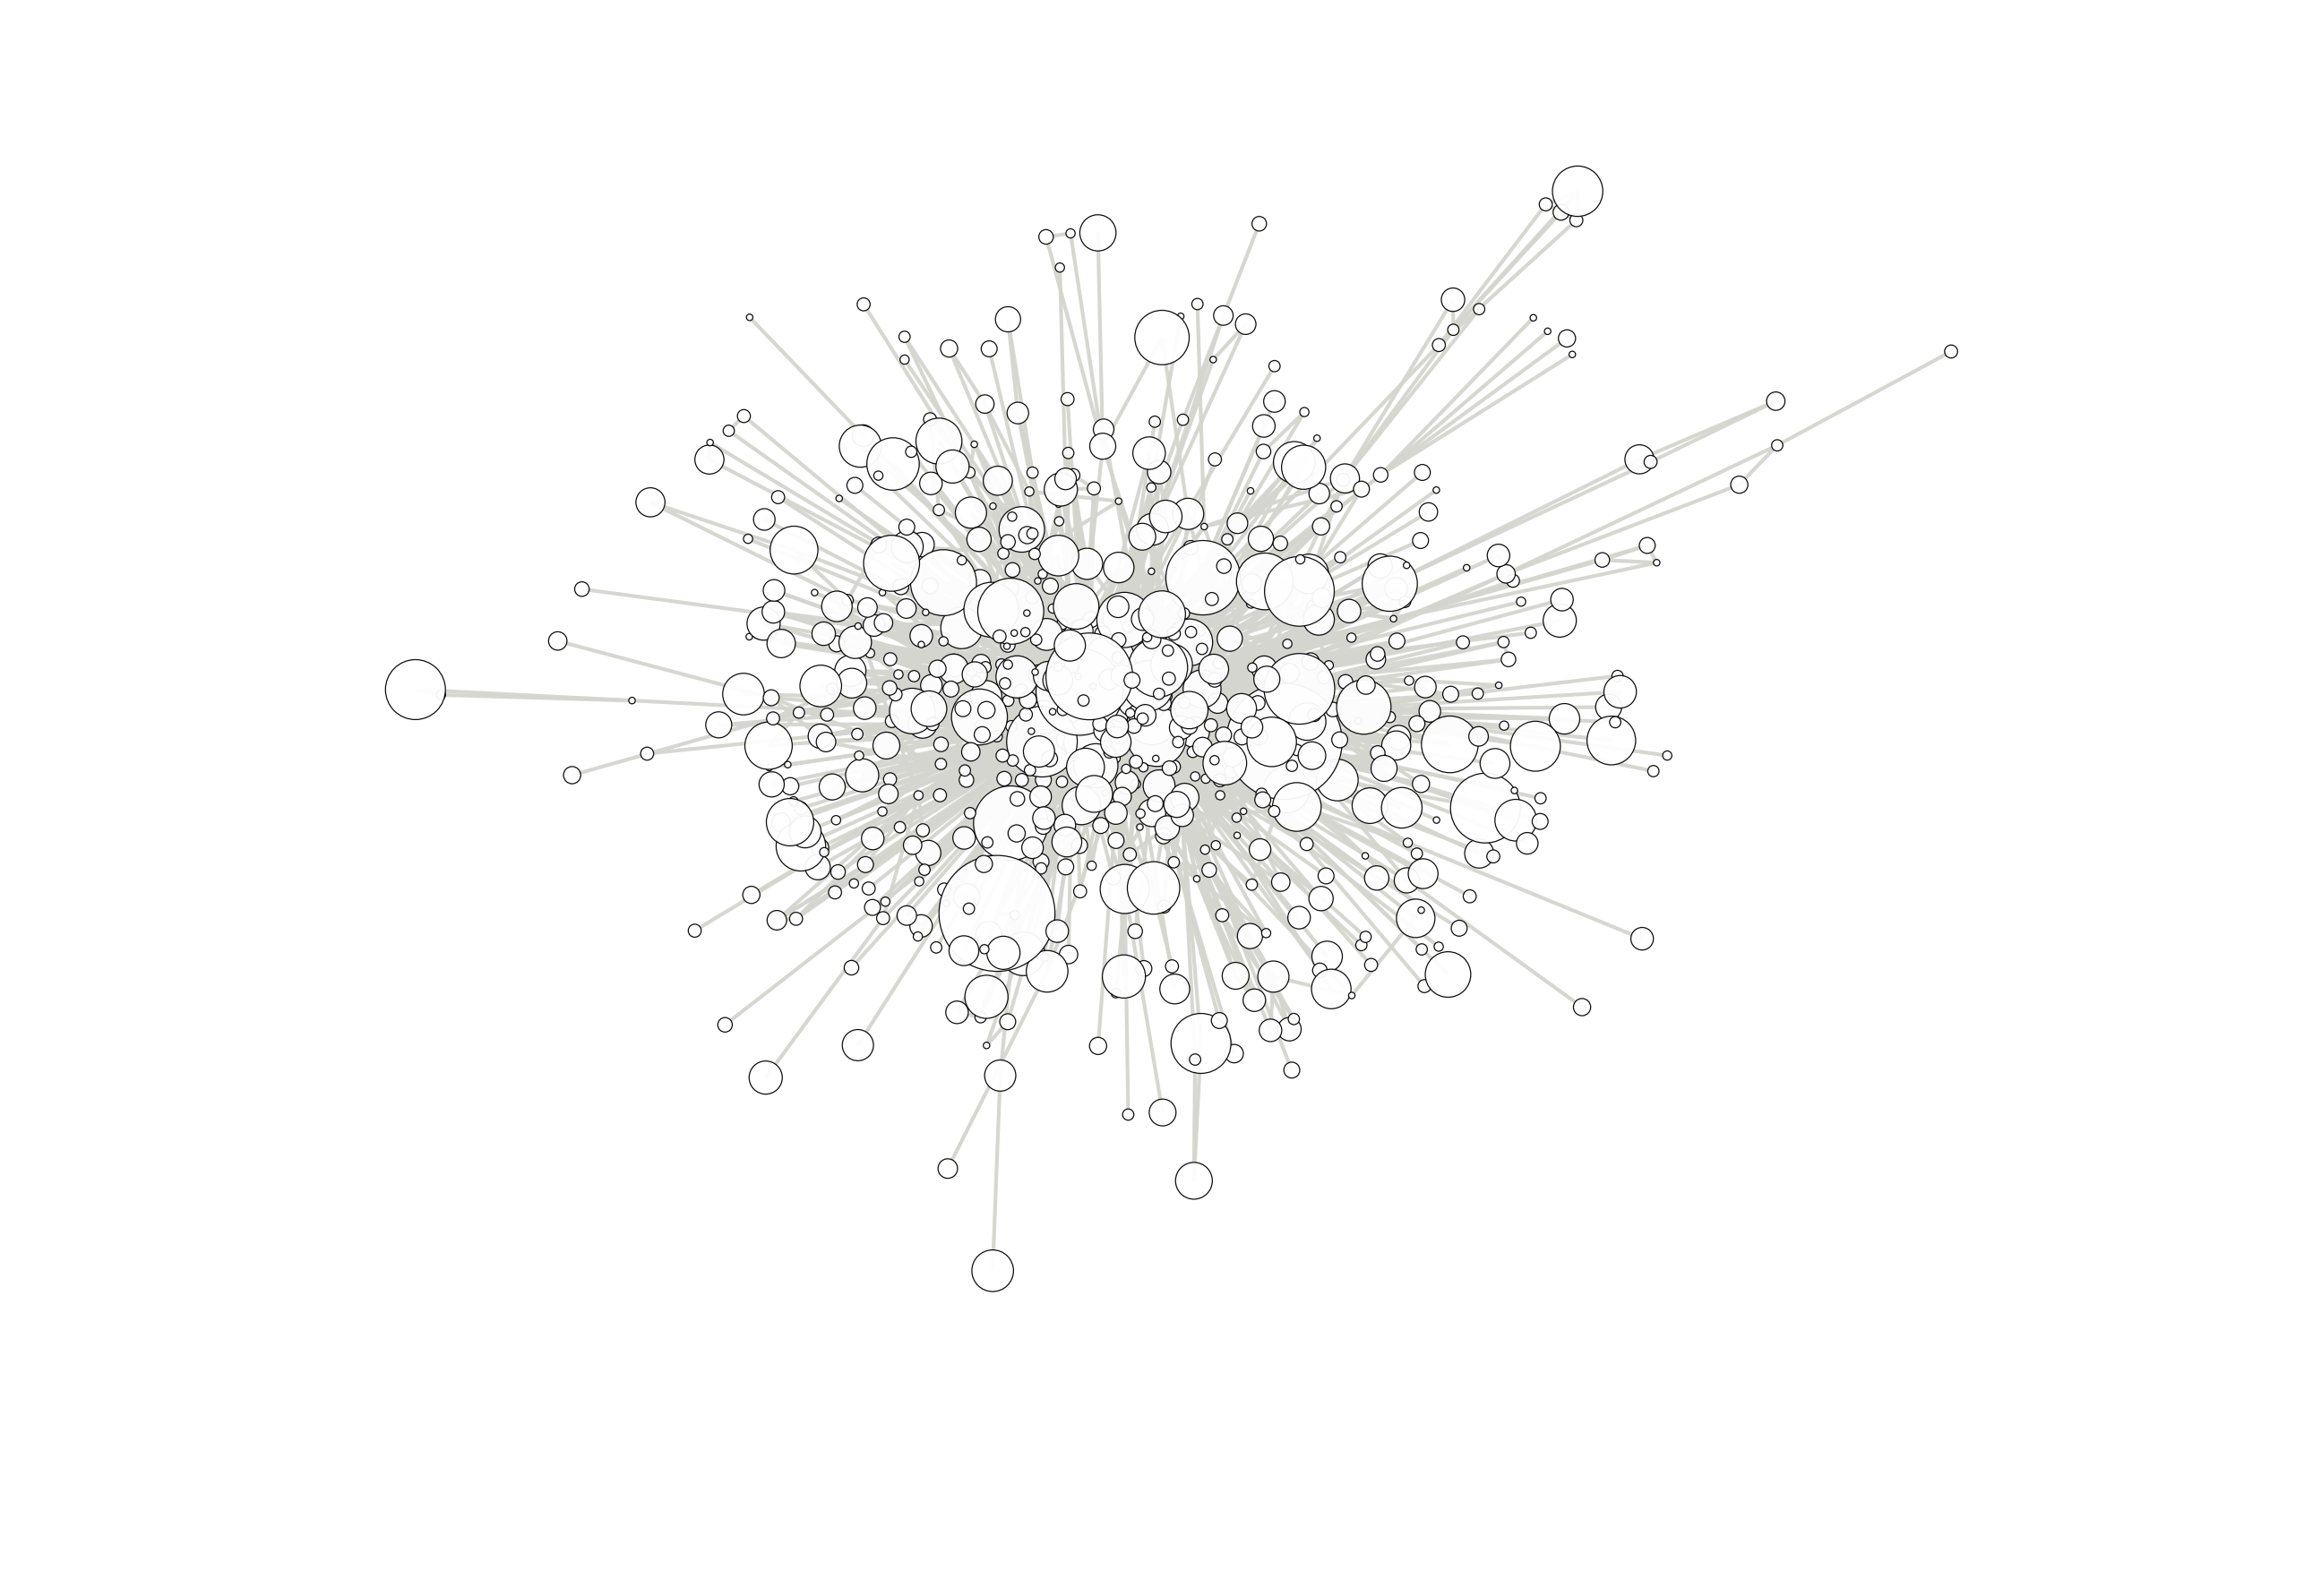

In [20]:
deg = nx.degree_centrality(multilevelGiant)
size = [2000 * deg[node] for node in two_mode]

nx.draw_spring(multilevelGiant, with_labels = False, node_size = size, 
               node_color = '#FFFFFF', edge_color = "#D4D5CE", alpha = .95)

# Writing Networks to Disk

In [21]:
mk.writeGraph(coauth_net , 'generated_datasets/journal_document_cocitework')

# Interactive Network Visualizations with *mkD3*

To change the type of network that is being visualized, you can change two variables in the next cell.
- **`networkType`** should be set to `"Citation"`, `"CoCitation"`, or `"CoAuthor"`.
    "- **`nodeType`** should be set to `"full\"`, `\"author\"`, `\"journal\"`, or `\"year\"`. (`\"full\"` nodes are individual articles or books)"

In [22]:
# Variables to Set
# ****************
networkType = "CoCitation"
nodeType = "full"

# Create the Network
# ******************
if networkType == "CoCitation":
    net = RC1014.networkCoCitation(nodeType = nodeType, coreOnly=True)
    directed = False
elif networkType == "CoAuthor":
    net = RC1014.networkCoAuthor()
    directed = False
elif networkType == "Citation":
    net = RC1014.networkCitation(nodeType=nodeType, coreOnly=True)
    directed = True
else:
    print("Please ensure networkType has been set to one of the accepted values")

# Simplify the Network
# ********************
mk.dropEdges(net, minWeight = 2, dropSelfLoops = True) 
net.remove_nodes_from(nx.isolates(net)) # Remove nodes which are isolates


# Add Node Data
# *************
if not directed: 
    partition = community.best_partition(net)
    betweenness = nx.betweenness_centrality(net)
    for n in net.nodes():
        betw = round(betweenness[n], 3)
        comm = partition[n]
        net.add_node(n, community=comm, betweenness=betw)
else: 
    betweenness = nx.betweenness_centrality(net)
    for n in net.nodes():
        betw = round(betweenness[n], 3)
        net.add_node(n, betweenness=betw)

mk.writeGraph(net, "generated_datasets/network")

# Create Link to Heatmap
from IPython.display import display, HTML
display(HTML('<a href="mkD3_static/network.html">Open network graph</a>'))